# Table of contents

0. Introduction

1. Load the dataset(1) - 전체 dataset 확인 | In[1]~

2. Load the dataset(2) - `RA`와 `LA` dataset를 각각 따로 분리 | In[7]~  
   2.1. Convert to Sequential dataset & One-hot Encoding | In[22]~

3. Training & Save(1): `RA model` | In[28]~

4. Training & Save(2): `LA model` | In[37]~

5. Transfer training(1): `LA model`을 재사용해서 `RA`에 맞추기 | In[45]~  
   5.1. fine-tuning | In[52]~

6. Transfer training(2): `RA model`을 재사용해서 `LA`에 맞추기 | In[61]~  
   6.1. fine-tuning | In[70]~

7. References

# 0. Introduction

**Dataset**  
* [HAR](https://github.com/MyungKyuYi/AI-class/blob/main/Pre-trained_model.ipynb)

**Environment**
* macOS `x86`cpu

**Framework**  
* TensorFlow: Version `2.10.0`

**Dependencies**  
* Python: Version `3.9.19`
* Numpy: Version `1.24.3`
* Pandas: Version `2.2.2`
* Matplotlib: Version `3.9.2`
* scikit-learn: Version `1.2.2`

**Purpose**
* Transfer learning을 사용한다.

**Abstraction**  
T(Total?), RA(Right Arm), LA(Left Arm), RL(Right Leg), LL(Left Leg), activity(현재 활동 구분), people(피실험자 구분)으로 구성된 dataset이다.  
특정 활동 상태일 때의 팔과 다리 등의 신체부위 관련 값이 기록되어 있다.  
model은 이를 학습하여 신체부위 관련 값이 input으로 들어왔을 때 활동 상태를 예측할 수 있다.

# 1. Load the dataset(1) - 전체 dataset 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
print(df.columns)

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)


In [73]:
for column in df.columns:
    print(column)

# T: Total(?)
# RA: Right Arm
# LA: Left Arm
# RL: Right Leg
# LL: Left Leg
# activity: label. 신체 부위 값에 따른 현재 활동 구분
# people

T_xacc_mean
T_xacc_max
T_xacc_min
T_xacc_var
T_xacc_std
T_xacc_skew
T_yacc_mean
T_yacc_max
T_yacc_min
T_yacc_var
T_yacc_std
T_yacc_skew
T_zacc_mean
T_zacc_max
T_zacc_min
T_zacc_var
T_zacc_std
T_zacc_skew
T_xgyro_mean
T_xgyro_max
T_xgyro_min
T_xgyro_var
T_xgyro_std
T_xgyro_skew
T_ygyro_mean
T_ygyro_max
T_ygyro_min
T_ygyro_var
T_ygyro_std
T_ygyro_skew
T_zgyro_mean
T_zgyro_max
T_zgyro_min
T_zgyro_var
T_zgyro_std
T_zgyro_skew
T_xmag_mean
T_xmag_max
T_xmag_min
T_xmag_var
T_xmag_std
T_xmag_skew
T_ymag_mean
T_ymag_max
T_ymag_min
T_ymag_var
T_ymag_std
T_ymag_skew
T_zmag_mean
T_zmag_max
T_zmag_min
T_zmag_var
T_zmag_std
T_zmag_skew
RA_xacc_mean
RA_xacc_max
RA_xacc_min
RA_xacc_var
RA_xacc_std
RA_xacc_skew
RA_yacc_mean
RA_yacc_max
RA_yacc_min
RA_yacc_var
RA_yacc_std
RA_yacc_skew
RA_zacc_mean
RA_zacc_max
RA_zacc_min
RA_zacc_var
RA_zacc_std
RA_zacc_skew
RA_xgyro_mean
RA_xgyro_max
RA_xgyro_min
RA_xgyro_var
RA_xgyro_std
RA_xgyro_skew
RA_ygyro_mean
RA_ygyro_max
RA_ygyro_min
RA_ygyro_var
RA_ygyro_std
RA

In [5]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

Text(0, 0.5, 'Count')

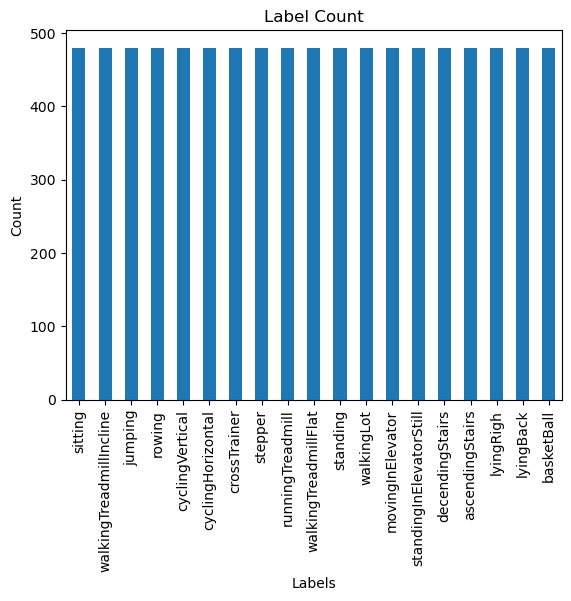

In [6]:
# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

# 2. Load the dataset(2) - RA와 LA dataset를 각각 따로 분리

In [7]:
# ReftArm과 LightArm만 각각 따로 분리해서 dataset 만들기
df_RA = df.filter(regex='RA_')
df_LA = df.filter(regex='LA_')

> **cf. [`pandas.DataFrame.filter`](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.filter.html#pandas-dataframe-filter)**  
> ```python
> DataFrame.filter(items=None, like=None, regex=None, axis=None)
> ```
> * * *
> Subset the DataFrame or Series according to the specified index labels.  
For DataFrame, filter rows or columns depending on axis argument. Note that this routine does not filter based on content. The filter is applied to the labels of the index.  
> `regex str (regular expression)`
Keep labels from axis for which re.search(regex, label) == True.
> * * * 
> 조건에 일치하는 columns(rows)만 Keep하고 나머지는 다 필터링한 뒤에 리턴한다.

In [8]:
# label로 사용할 'activity'를 dataset에 추가
df_RA.insert(3, 'activity', df['activity'])
df_LA.insert(3, 'activity', df['activity'])

In [9]:
df_RA

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,activity,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,sitting,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,sitting,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,sitting,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,sitting,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,sitting,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.690373,30.46300,-4.90150,basketBall,47.192912,6.869710,0.650080,2.187710,41.3410,-10.1410,...,-0.89670,0.177217,0.420971,1.232819,-0.120793,0.58641,-0.61373,0.077901,0.279107,0.611462
9116,6.477090,48.54700,-9.96820,basketBall,44.135927,6.643488,1.675812,5.845459,33.7910,-48.3200,...,-0.85305,0.158099,0.397617,1.560701,-0.133269,0.51707,-0.52776,0.058400,0.241661,0.574120
9117,6.309986,27.29900,-8.43140,basketBall,57.018917,7.551087,0.108921,6.342772,27.0570,-6.6706,...,-0.83512,0.126188,0.355229,1.598340,-0.567238,-0.14483,-0.82409,0.023408,0.152998,0.598665
9118,5.020496,30.16600,-20.25100,basketBall,67.001032,8.185416,0.157547,5.824265,27.6300,-19.8830,...,-0.87361,0.174494,0.417725,0.758435,0.211566,0.67931,-0.22328,0.060114,0.245181,0.316989


In [10]:
df_LA

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,activity,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,sitting,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,sitting,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,sitting,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,sitting,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,sitting,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.834459,40.1640,-15.3980,basketBall,140.063928,11.834861,0.486128,-3.441297,39.7590,-53.6520,...,-0.87575,0.210911,0.459250,-0.421162,-0.529403,0.653000,-0.879310,0.123917,0.352018,1.813520
9116,6.647402,43.9160,-22.3060,basketBall,65.655140,8.102786,0.067916,-5.140474,26.7770,-41.9160,...,-0.77618,0.143162,0.378368,-1.307983,-0.466066,0.659650,-0.835960,0.167255,0.408968,1.483683
9117,3.108810,40.2770,-10.9500,basketBall,84.701543,9.203344,1.178224,-4.881662,43.4020,-27.3490,...,0.16648,0.035696,0.188933,-0.736037,-0.286489,0.632420,-0.837640,0.109532,0.330956,0.502392
9118,5.141190,68.5920,-43.1120,basketBall,137.860050,11.741382,1.219670,-3.365847,23.6960,-34.5820,...,-0.85130,0.205452,0.453268,0.171353,-0.567578,0.264780,-0.854420,0.059971,0.244890,1.467799


In [11]:
df_RA['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [12]:
df_LA['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [13]:
# string -> int로 바꾸는 LabelEncoder 사용
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])

# 별도의 LabelEncoder 객체를 사용해야 함
label_encoder = LabelEncoder()
df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])

/var/folders/m_/5z28qmvj575cs_9xldf0gyd80000gn/T/ipykernel_13261/1588367589.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])
/var/folders/m_/5z28qmvj575cs_9xldf0gyd80000gn/T/ipykernel_13261/1588367589.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])


In [14]:
df_RA['activity'].value_counts()

# labeling success

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

In [15]:
df_LA['activity'].value_counts()

# labeling success

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

In [16]:
# X, y 분리
df_RA_X = df_RA.drop('activity', axis=1)
df_RA_Y = df_RA['activity']

print(f"df_RA_X.head(): \n{df_RA_X.head()} \n")
print(f"df_RA_Y.head(): \n{df_RA_Y.head()}")

df_RA_X.head(): 
   RA_xacc_mean  RA_xacc_max  RA_xacc_min  RA_xacc_var  RA_xacc_std  \
0      0.679134      0.75930      0.58542     0.001546     0.039324   
1      0.644964      0.73158      0.53064     0.001333     0.036508   
2      0.608212      0.67737      0.53546     0.000637     0.025244   
3      0.591138      0.71177      0.51524     0.001349     0.036731   
4      0.558168      0.67190      0.50535     0.000626     0.025020   

   RA_xacc_skew  RA_yacc_mean  RA_yacc_max  RA_yacc_min  RA_yacc_var  ...  \
0     -0.415694      5.713088       5.8483       5.5956     0.003779  ...   
1      0.410625      5.795154       5.9546       5.6687     0.001132  ...   
2      0.153302      5.833086       5.8918       5.7656     0.000488  ...   
3      0.525019      5.863846       5.9645       5.7556     0.001423  ...   
4      1.076782      5.884745       5.9401       5.8384     0.000471  ...   

   RA_ymag_min  RA_ymag_var  RA_ymag_std  RA_ymag_skew  RA_zmag_mean  \
0     -0.57428     0.

In [17]:
# train, test 분리
from sklearn.model_selection import train_test_split

X_train_RA, X_test_RA, y_train_RA, y_test_RA = train_test_split(df_RA_X,
                                                                df_RA_Y,
                                                                test_size=0.25,
                                                                random_state=42)

In [18]:
# X, y 분리
df_LA_X = df_LA.drop('activity', axis=1)
df_LA_Y = df_LA['activity']

print(f"df_LA_X.head(): \n{df_LA_X.head()} \n")
print(f"df_LA_Y.head(): \n{df_LA_Y.head()}")

df_LA_X.head(): 
   LA_xacc_mean  LA_xacc_max  LA_xacc_min  LA_xacc_var  LA_xacc_std  \
0      3.403317       3.4875       3.2682     0.001583     0.039790   
1      3.427302       3.6630       3.3168     0.004305     0.065614   
2      3.400870       3.5168       3.3315     0.001007     0.031732   
3      3.391002       3.5311       3.2608     0.001792     0.042328   
4      3.359974       3.4434       3.3069     0.000633     0.025160   

   LA_xacc_skew  LA_yacc_mean  LA_yacc_max  LA_yacc_min  LA_yacc_var  ...  \
0     -0.744647     -8.375713      -8.2927      -8.4821     0.001178  ...   
1      1.000107     -8.397591      -8.3118      -8.5017     0.001098  ...   
2      0.978319     -8.439138      -8.3599      -8.5204     0.000684  ...   
3      0.117935     -8.441421      -8.3207      -8.5446     0.001862  ...   
4      1.051627     -8.454854      -8.3202      -8.5561     0.001061  ...   

   LA_ymag_min  LA_ymag_var  LA_ymag_std  LA_ymag_skew  LA_zmag_mean  \
0      0.33748     0.

In [19]:
# train, test 분리
from sklearn.model_selection import train_test_split

X_train_LA, X_test_LA, y_train_LA, y_test_LA = train_test_split(df_LA_X,
                                                                df_LA_Y,
                                                                test_size=0.25,
                                                                random_state=42)

In [20]:
print(f"X_train_RA.shape: {X_train_RA.shape}")
print(f"X_test_RA.shape: {X_test_RA.shape}")
print(f"y_train_RA.shape: {y_train_RA.shape}")
print(f"y_test_RA.shape: {y_test_RA.shape}")

X_train_RA.shape: (6840, 54)
X_test_RA.shape: (2280, 54)
y_train_RA.shape: (6840,)
y_test_RA.shape: (2280,)


In [21]:
print(f"X_train_LA.shape: {X_train_LA.shape}")
print(f"y_train_LA.shape: {y_train_LA.shape}")
print(f"X_test_LA.shape: {X_test_LA.shape}")
print(f"y_test_LA.shape: {y_test_LA.shape}")

X_train_LA.shape: (6840, 54)
y_train_LA.shape: (6840,)
X_test_LA.shape: (2280, 54)
y_test_LA.shape: (2280,)


## 2.1. Convert to Sequential dataset & One-hot Encoding

In [22]:
# Sequential dataset 만들기
from collections import Counter

def split_sequences_classification_majority(data, labels, n_steps):
    """
    비연속 데이터셋을 일정한 길이의 연속적인 시퀀스로 변환하는 함수
    window에서 다수를 차지하는 label로 결정
    
    Args:
    data: 원본 데이터 (리스트 또는 배열)
    labels: 각 데이터에 해당하는 클래스 라벨 (리스트 또는 배열)
    n_steps: 시퀀스의 길이 (정수)
    
    Returns:
    X: 입력 시퀀스
    y: 해당 시퀀스에 대한 다수 라벨
    """
    X, y = [], []
    
    for i in range(len(data) - n_steps + 1):
        # 시퀀스 추출
        seq_x = data[i:i + n_steps]
        seq_labels = labels[i:i + n_steps]
        
        # 시퀀스의 라벨 중 가장 빈번한 라벨을 선택 (다수결)
        most_common_label = Counter(seq_labels).most_common(1)[0][0]
        
        X.append(seq_x)
        y.append(most_common_label)
    
    return np.array(X), np.array(y)

In [23]:
# Sequential dataset 만들기 - RA
n_steps = 3
X_train_seq_RA, y_train_seq_RA = split_sequences_classification_majority(X_train_RA,
                                                                         y_train_RA,
                                                                         n_steps)

X_test_seq_RA, y_test_seq_RA = split_sequences_classification_majority(X_test_RA,
                                                                       y_test_RA,
                                                                       n_steps)

print(f"X_train_seq_RA.shape: {X_train_seq_RA.shape}", end=" ")
print(f"y_train_seq_RA.shape: {y_train_seq_RA.shape}")
print(f"X_test_seq_RA.shape: {X_test_seq_RA.shape}", end=" ")
print(f"y_test_seq_RA.shape: {y_test_seq_RA.shape}")

X_train_seq_RA.shape: (6838, 3, 54) y_train_seq_RA.shape: (6838,)
X_test_seq_RA.shape: (2278, 3, 54) y_test_seq_RA.shape: (2278,)


In [24]:
# one-hot encoding - RA
from keras.utils import to_categorical

y_train_seq_RA = to_categorical(y_train_seq_RA)
y_test_seq_RA = to_categorical(y_test_seq_RA)

print("==== one-hot encoded ====")
print(f"y_train_seq_RA.shape: {y_train_seq_RA.shape}")
print(f"y_test_seq_RA.shape: {y_test_seq_RA.shape}")

2024-09-24 17:36:45.593438: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


==== one-hot encoded ====
y_train_seq_RA.shape: (6838, 19)
y_test_seq_RA.shape: (2278, 19)


In [25]:
# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train_seq_RA.shape[1], X_train_seq_RA.shape[2], y_train_seq_RA.shape[1]
print(n_timesteps, n_features, n_outputs)

3 54 19


In [26]:
# Sequential dataset 만들기 - LA
n_steps = 3
X_train_seq_LA, y_train_seq_LA = split_sequences_classification_majority(X_train_LA,
                                                                         y_train_LA,
                                                                         n_steps)

X_test_seq_LA, y_test_seq_LA = split_sequences_classification_majority(X_test_LA,
                                                                       y_test_LA,
                                                                       n_steps)

print(f"X_train_seq_LA.shape: {X_train_seq_LA.shape}", end=" ")
print(f"y_train_seq_LA.shape: {y_train_seq_LA.shape}")
print(f"X_test_seq_LA.shape: {X_test_seq_LA.shape}", end=" ")
print(f"y_test_seq_LA.shape: {y_test_seq_LA.shape}")

X_train_seq_LA.shape: (6838, 3, 54) y_train_seq_LA.shape: (6838,)
X_test_seq_LA.shape: (2278, 3, 54) y_test_seq_LA.shape: (2278,)


In [27]:
# one-hot encoding - LA
from keras.utils import to_categorical

y_train_seq_LA = to_categorical(y_train_seq_LA)
y_test_seq_LA = to_categorical(y_test_seq_LA)

print("==== one-hot encoded ====")
print(f"y_train_seq_LA.shape: {y_train_seq_LA.shape}")
print(f"y_test_seq_LA.shape: {y_test_seq_LA.shape}")

==== one-hot encoded ====
y_train_seq_LA.shape: (6838, 19)
y_test_seq_LA.shape: (2278, 19)


# 3. Training & Save(1): RA model

In [28]:
import tensorflow as tf
import tensorflow.keras as keras

In [29]:
# for RA
model_RA = keras.Sequential()
model_RA.add(keras.layers.LSTM(units=128,
                               input_shape=(3, 54),
                               name='lstm1_base_RA'))
model_RA.add(keras.layers.Dense(units=128,
                                activation='relu',
                                name='dense1_base_RA'))
model_RA.add(keras.layers.Dense(units=19,
                                activation='softmax',
                                name='output_base_RA'))
model_RA.summary()

2024-09-24 17:36:48.865732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm1_base_RA (LSTM)        (None, 128)               93696     
                                                                 
 dense1_base_RA (Dense)      (None, 128)               16512     
                                                                 
 output_base_RA (Dense)      (None, 19)                2451      
                                                                 
Total params: 112,659
Trainable params: 112,659
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_RA.compile(optimizer='adam',
                 metrics=['accuracy'],
                 loss='categorical_crossentropy')

In [31]:
history_RA = model_RA.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 [==============================] - 2s 5ms/step - loss: 2.0566 - accuracy: 0.3430 - val_loss: 1.2963 - val_accuracy: 0.5673
Epoch 2/20
193/193 [==============================] - 1s 3ms/step - loss: 1.0808 - accuracy: 0.6620 - val_loss: 0.8661 - val_accuracy: 0.7135
Epoch 3/20
193/193 [==============================] - 1s 3ms/step - loss: 0.7780 - accuracy: 0.7684 - val_loss: 0.7192 - val_accuracy: 0.7997
Epoch 4/20
193/193 [==============================] - 1s 3ms/step - loss: 0.6325 - accuracy: 0.8107 - val_loss: 0.6007 - val_accuracy: 0.8246
Epoch 5/20
193/193 [==============================] - 1s 3ms/step - loss: 0.5086 - accuracy: 0.8484 - val_loss: 0.5715 - val_accuracy: 0.8333
Epoch 6/20
193/193 [==============================] - 1s 3ms/step - loss: 0.4196 - accuracy: 0.8770 - val_loss: 0.5064 - val_accuracy: 0.8450
Epoch 7/20
193/193 [==============================] - 1s 3ms/step - loss: 0.3552 - accuracy: 0.8976 - val_loss: 0.5212 - val_accuracy: 0.8480
Epoch 

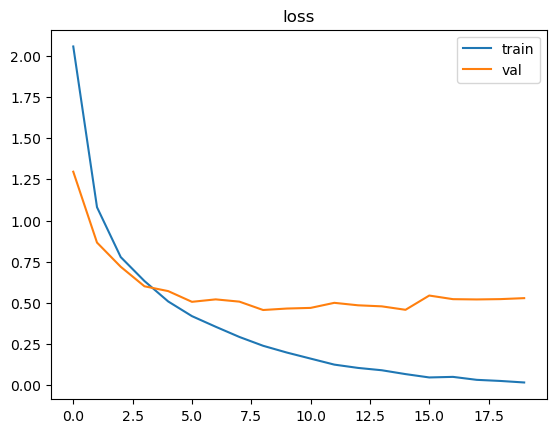

In [32]:
plt.plot(history_RA.history['loss'], label = 'train')
plt.plot(history_RA.history['val_loss'], label = 'val')
plt.title('loss')
plt.legend()

In [33]:
model_RA.evaluate(X_train_seq_RA, y_train_seq_RA)

214/214 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9873


[0.06339463591575623, 0.9872769713401794]

In [34]:
model_RA.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.8802


[0.5843726992607117, 0.880158007144928]

72/72 [==============================] - 0s 1ms/step
Confusion Matrix


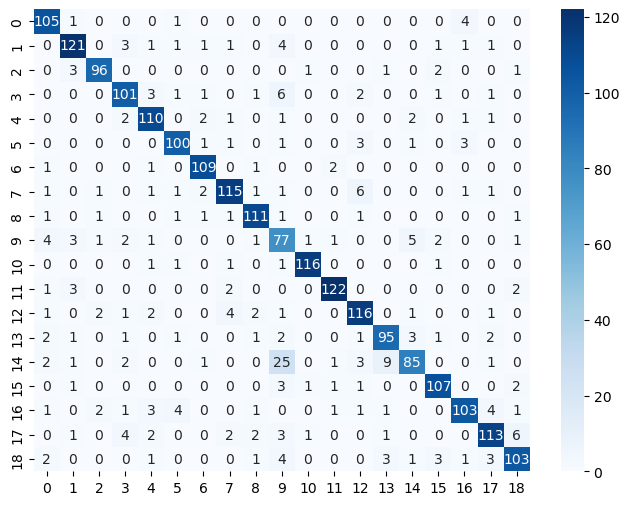

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_RA, axis=1)
Y_pred = np.argmax(model_RA.predict(X_test_seq_RA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [36]:
# RA model save
base_loss,base_accuracy=model_RA.evaluate(X_test_seq_RA, y_test_seq_RA)

model_RA_file='./datasets/HAR/DSADS/RA_Model.h5'
  
tf.keras.models.save_model(model_RA, model_RA_file, include_optimizer=False)
print('model saved at ', model_RA_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.8802
model saved at  ./datasets/HAR/DSADS/RA_Model.h5
Accuracy >88.015801
Base Loss >0.58


# 4. Training & Save(2): LA model

In [37]:
# for LA
model_LA = keras.Sequential()
model_LA.add(keras.layers.LSTM(units=128,
                               input_shape=(3, 54),
                               name='lstm1_base_LA'))
model_LA.add(keras.layers.Dense(units=128,
                                activation='relu',
                                name='dense1_base_LA'))
model_LA.add(keras.layers.Dense(units=19,
                                activation='softmax',
                                name='output_base_LA'))
model_LA.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm1_base_LA (LSTM)        (None, 128)               93696     
                                                                 
 dense1_base_LA (Dense)      (None, 128)               16512     
                                                                 
 output_base_LA (Dense)      (None, 19)                2451      
                                                                 
Total params: 112,659
Trainable params: 112,659
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_LA.compile(optimizer='adam',
                 metrics=['accuracy'],
                 loss='categorical_crossentropy')

In [39]:
history_LA = model_LA.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 [==============================] - 2s 5ms/step - loss: 2.0084 - accuracy: 0.3659 - val_loss: 1.2008 - val_accuracy: 0.5980
Epoch 2/20
193/193 [==============================] - 1s 3ms/step - loss: 0.9814 - accuracy: 0.6838 - val_loss: 0.7530 - val_accuracy: 0.7749
Epoch 3/20
193/193 [==============================] - 1s 3ms/step - loss: 0.7086 - accuracy: 0.7873 - val_loss: 0.6368 - val_accuracy: 0.8114
Epoch 4/20
193/193 [==============================] - 1s 3ms/step - loss: 0.5514 - accuracy: 0.8391 - val_loss: 0.5403 - val_accuracy: 0.8436
Epoch 5/20
193/193 [==============================] - 1s 3ms/step - loss: 0.4466 - accuracy: 0.8729 - val_loss: 0.4711 - val_accuracy: 0.8567
Epoch 6/20
193/193 [==============================] - 1s 3ms/step - loss: 0.3737 - accuracy: 0.8895 - val_loss: 0.4456 - val_accuracy: 0.8655
Epoch 7/20
193/193 [==============================] - 1s 3ms/step - loss: 0.3064 - accuracy: 0.9079 - val_loss: 0.4295 - val_accuracy: 0.8787
Epoch 

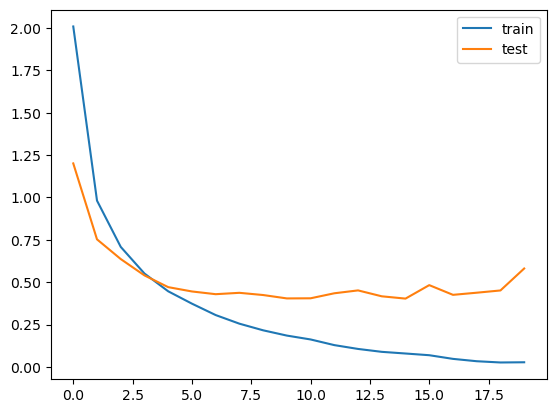

In [40]:
plt.plot(history_LA.history["loss"], label = "train")
plt.plot(history_LA.history["val_loss"], label = "test")
plt.legend()

In [41]:
model_LA.evaluate(X_train_seq_LA, y_train_seq_LA)

214/214 [==============================] - 0s 1ms/step - loss: 0.1295 - accuracy: 0.9653


[0.129534512758255, 0.9653407335281372]

In [42]:
model_LA.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.8644


[0.6470658779144287, 0.86435467004776]

72/72 [==============================] - 0s 1ms/step
Confusion Matrix


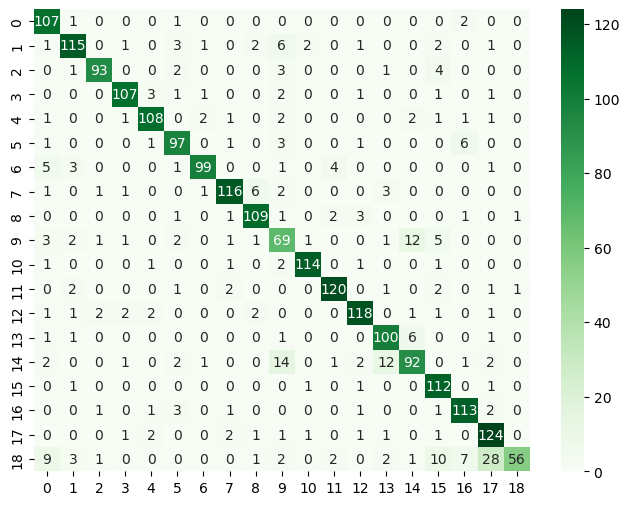

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_LA, axis=1)
Y_pred = np.argmax(model_LA.predict(X_test_seq_LA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

# 그래프 표시
plt.show()

In [44]:
# LA model save
base_loss,base_accuracy=model_LA.evaluate(X_test_seq_LA, y_test_seq_LA)

model_LA_file='./datasets/HAR/DSADS/LA_Model.h5'
  
tf.keras.models.save_model(model_LA, model_LA_file, include_optimizer=False)
print('model saved at ', model_LA_file)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.8644
model saved at  ./datasets/HAR/DSADS/LA_Model.h5
Accuracy >86.435467
Base Loss >0.65


# 5. Transfer training(1): LA model을 재사용해서 RA에 맞추기

In [45]:
# Base(pre-trained) model load (LA_Model.h5)
from tensorflow.keras.models import load_model

base_model_LA = load_model(model_LA_file)

In [46]:
base_model_LA.compile(optimizer='adam',
                      metrics=['accuracy'],
                      loss='categorical_crossentropy')
# LA dataset으로 pre-trained된 model을 LA data 예측에 사용
base_model_LA.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 1s 1ms/step - loss: 0.6471 - accuracy: 0.8644


[0.6470658779144287, 0.86435467004776]

In [47]:
# LA dataset으로 pre-trained된 model을 RA data 예측에 사용
base_model_LA.evaluate(X_test_seq_RA, y_test_seq_RA)

# 당연하게도 accuracy가 매우 낮다. 0.2xx

72/72 [==============================] - 0s 1ms/step - loss: 6.0877 - accuracy: 0.2322


[6.087687969207764, 0.23222124576568604]

새로운 data RA는 pre-trained data LA와는 조금 다르다.  
따라서 RA의 특징을 학습시킬 layer가 필요하다.

In [48]:
print("Number of layers in the base model: ", len(base_model_LA.layers))

Number of layers in the base model:  3


In [49]:
base_model_LA.layers

In [50]:
new_model_RA = tf.keras.models.clone_model(base_model_LA)
new_model_RA.set_weights(base_model_LA.get_weights())

# clone_model()은 가중치는 제외하고 구조(layers)만 복제한다.
# 따라서 set_weights()를 사용해서 가중치를 수동으로 복사해주어야 한다.

* `base_model_clone.trainable`  
  - model의 모든 layers 중에 trainable이 하나라도 있다면 True를 리턴
* `base_model_clone.trainable = False`
  - model의 모든 layers의 trainable을 False로 변경
* `base_model_clone.layers`
  - model의 layer 목록을 리턴  
    [<keras.layers.rnn.lstm.LSTM at 0x7f7ee0b260d0>,  
 <keras.layers.core.dense.Dense at 0x7f7edeab3520>,  
 <keras.layers.core.dense.Dense at 0x7f7ed2902610>]
* `base_model_clone.layers[i].trainable = False`
  - model의 특정 layer만 trainable을 False로 변경

In [51]:
def print_layers(model):
    for layer in model.layers:
        print(f"{layer.name}: {layer}")

## 5.1. fine-tuning

In [52]:
# fine tuning(1)
# 기존 model의 output layer는 LA에 맞춰져 있음
# 따라서 이를 삭제하고, RA용 output layer와 추가 학습용 Dense를 새로 추가
print("삭제 전:")
print_layers(new_model_RA)

new_model_RA.pop()
print("삭제 후:")
print_layers(new_model_RA)

# RA용 학습 Dense layer
new_model_RA.add(keras.layers.Dense(units=64,
                                    activation='relu',
                                    name='dense2_new_RA'))
# RA용 output layer
new_model_RA.add(keras.layers.Dense(units=19,
                                    activation='softmax',
                                    name='output_new_RA'))
print("추가 후:")
print_layers(new_model_RA)

삭제 전:
lstm1_base_LA: <keras.layers.rnn.lstm.LSTM object at 0x7fadf65dc4f0>
dense1_base_LA: <keras.layers.core.dense.Dense object at 0x7fadf65e9a60>
output_base_LA: <keras.layers.core.dense.Dense object at 0x7fadf665c730>
삭제 후:
lstm1_base_LA: <keras.layers.rnn.lstm.LSTM object at 0x7fadf65dc4f0>
dense1_base_LA: <keras.layers.core.dense.Dense object at 0x7fadf65e9a60>
추가 후:
lstm1_base_LA: <keras.layers.rnn.lstm.LSTM object at 0x7fadf65dc4f0>
dense1_base_LA: <keras.layers.core.dense.Dense object at 0x7fadf65e9a60>
dense2_new_RA: <keras.layers.core.dense.Dense object at 0x7fadf6551670>
output_new_RA: <keras.layers.core.dense.Dense object at 0x7fadf65e77c0>


In [53]:
new_model_RA.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm1_base_LA (LSTM)        (None, 128)               93696     
                                                                 
 dense1_base_LA (Dense)      (None, 128)               16512     
                                                                 
 dense2_new_RA (Dense)       (None, 64)                8256      
                                                                 
 output_new_RA (Dense)       (None, 19)                1235      
                                                                 
Total params: 119,699
Trainable params: 119,699
Non-trainable params: 0
_________________________________________________________________


In [54]:
# fine tuning(2)
# base_model의 layers는 freeze한다. 가중치가 추가로 학습되지 않고, pre-trained를 쓰려고
# 현재 base_model_clone의 [0], [1] layer가 여기에 해당
for layer in new_model_RA.layers[:2]:
    layer.trainable = False

# 변경 결과 확인
layer_num = 0
for layer in new_model_RA.layers:
    print(f"{layer_num}번 레이어({layer.name})의 trainable: {layer.trainable}")
    layer_num += 1

0번 레이어(lstm1_base_LA)의 trainable: False
1번 레이어(dense1_base_LA)의 trainable: False
2번 레이어(dense2_new_RA)의 trainable: True
3번 레이어(output_new_RA)의 trainable: True


In [55]:
# fine tuning(3)
# compile() method는 훈련 때 어떤 레이어의 가중치에 대해서 학습할 것이고,
# 학습할 때 어떤 방법(옵티마이저, 로스, ...)을 사용할 것인지를 사전에 정의하는 것임
# 따라서 특정 layer를 freeze한 후에는 반드시 compile해야 됨
new_model_RA.compile(optimizer='adam',
                     metrics=['accuracy'],
                     loss='categorical_crossentropy')

In [56]:
# fine tuning(4)
# 이제 실제로 RA 전용 가중치에 대해서만 학습 진행
history_new_RA = new_model_RA.fit(X_train_seq_RA, y_train_seq_RA,
                                  epochs=20,
                                  batch_size=32,
                                  validation_split=0.1,
                                  shuffle=True)
new_model_RA.summary()

Epoch 1/20
193/193 [==============================] - 2s 3ms/step - loss: 2.2945 - accuracy: 0.3201 - val_loss: 1.8337 - val_accuracy: 0.4576
Epoch 2/20
193/193 [==============================] - 0s 2ms/step - loss: 1.6241 - accuracy: 0.4912 - val_loss: 1.6378 - val_accuracy: 0.4971
Epoch 3/20
193/193 [==============================] - 0s 2ms/step - loss: 1.4910 - accuracy: 0.5257 - val_loss: 1.5452 - val_accuracy: 0.5278
Epoch 4/20
193/193 [==============================] - 0s 2ms/step - loss: 1.4222 - accuracy: 0.5515 - val_loss: 1.5329 - val_accuracy: 0.5234
Epoch 5/20
193/193 [==============================] - 0s 2ms/step - loss: 1.3619 - accuracy: 0.5762 - val_loss: 1.5071 - val_accuracy: 0.5234
Epoch 6/20
193/193 [==============================] - 0s 2ms/step - loss: 1.3290 - accuracy: 0.5827 - val_loss: 1.4391 - val_accuracy: 0.5599
Epoch 7/20
193/193 [==============================] - 0s 2ms/step - loss: 1.2984 - accuracy: 0.5892 - val_loss: 1.4126 - val_accuracy: 0.5687
Epoch 

In [57]:
# base_model을 기반으로 RA에 대해서 추가 학습만 진행하도록 했을 때의 성능
new_model_RA.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 1ms/step - loss: 1.2459 - accuracy: 0.6238


[1.245948076248169, 0.623792827129364]

In [58]:
# fine tuning(5)
# 앞선 상황에서는 base model(LA) 고유의 layer의 가중치에 대해서는 학습하지 않았음
# LA와 RA가 비슷하다고는 해도, LA에 대해서만 학습했던 가중치들을 RA에 좀 더 맞게 미세조정 할 필요 있음
# 위 작업을 fine tuning이라고 함

# 위에서 freeze했던 것을 다시 unfreeze
for layer in new_model_RA.layers[:2]:
    layer.trainable = True # unfreeze
    
# 변경 결과 확인
layer_num = 0
for layer in new_model_RA.layers:
    print(f"{layer_num}번 레이어({layer.name})의 trainable: {layer.trainable}")
    layer_num += 1

0번 레이어(lstm1_base_LA)의 trainable: True
1번 레이어(dense1_base_LA)의 trainable: True
2번 레이어(dense2_new_RA)의 trainable: True
3번 레이어(output_new_RA)의 trainable: True


In [59]:
# fine tuning(6)

# fine tuning할 때의 learning rate는 말 그대로 미세하게 설정하는 것이 좋음
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
new_model_RA.compile(optimizer='adam',
                     metrics=['accuracy'],
                     loss='categorical_crossentropy')

history_new_RA_fine = new_model_RA.fit(X_train_seq_RA, y_train_seq_RA,
                                       epochs=20,
                                       batch_size=32,
                                       validation_split=0.1,
                                       shuffle=True)
new_model_RA.summary()

Epoch 1/20
193/193 [==============================] - 2s 5ms/step - loss: 0.8990 - accuracy: 0.7236 - val_loss: 0.7890 - val_accuracy: 0.7295
Epoch 2/20
193/193 [==============================] - 1s 3ms/step - loss: 0.6074 - accuracy: 0.8204 - val_loss: 0.6918 - val_accuracy: 0.7939
Epoch 3/20
193/193 [==============================] - 1s 3ms/step - loss: 0.4576 - accuracy: 0.8642 - val_loss: 0.5787 - val_accuracy: 0.8246
Epoch 4/20
193/193 [==============================] - 1s 3ms/step - loss: 0.3619 - accuracy: 0.8919 - val_loss: 0.5762 - val_accuracy: 0.8392
Epoch 5/20
193/193 [==============================] - 1s 3ms/step - loss: 0.2852 - accuracy: 0.9170 - val_loss: 0.5805 - val_accuracy: 0.8289
Epoch 6/20
193/193 [==============================] - 1s 3ms/step - loss: 0.2229 - accuracy: 0.9342 - val_loss: 0.6066 - val_accuracy: 0.8377
Epoch 7/20
193/193 [==============================] - 1s 3ms/step - loss: 0.1879 - accuracy: 0.9418 - val_loss: 0.5400 - val_accuracy: 0.8538
Epoch 

In [60]:
# fine tuning까지 했을 때의 성능
new_model_RA.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 1ms/step - loss: 0.7367 - accuracy: 0.8802


[0.7366754412651062, 0.880158007144928]

# 6. Transfer training(2): RA model을 재사용해서 LA에 맞추기
위에서는 LA model을 재사용해서 RA에 맞췄다.

In [61]:
# Base(pre-trained) model load (RA_Model.h5)
from tensorflow.keras.models import load_model

base_model_RA = load_model('./datasets/HAR/DSADS/RA_Model.h5')

In [62]:
new_model_LA = tf.keras.models.clone_model(base_model_RA)
new_model_LA.set_weights(base_model_RA.get_weights())

In [63]:
# RA model을 그대로 사용하여 LA data 예측
new_model_LA.compile(optimizer='adam',
                     metrics=['accuracy'],
                     loss='categorical_crossentropy')
# RA dataset으로 pre-trained된 model을 LA data 예측에 사용
new_model_LA.evaluate(X_test_seq_LA, y_test_seq_LA)

# accuracy is 0.2xx

72/72 [==============================] - 1s 1ms/step - loss: 6.0390 - accuracy: 0.2673


[6.0390191078186035, 0.2673397660255432]

In [64]:
print("삭제 전: ")
print_layers(new_model_LA)

new_model_LA.pop()
print("삭제 후: ")
print_layers(new_model_LA)

new_model_LA.add(keras.layers.Dense(units=64,
                                    activation='relu',
                                    name='dense2_new_LA'))
new_model_LA.add(keras.layers.Dense(units=19,
                                    activation='softmax',
                                    name='output_new_LA'))
print("추가 후: ")
print_layers(new_model_LA)

삭제 전: 
lstm1_base_RA: <keras.layers.rnn.lstm.LSTM object at 0x7faddad0d4f0>
dense1_base_RA: <keras.layers.core.dense.Dense object at 0x7faddad0deb0>
output_base_RA: <keras.layers.core.dense.Dense object at 0x7faddc0befa0>
삭제 후: 
lstm1_base_RA: <keras.layers.rnn.lstm.LSTM object at 0x7faddad0d4f0>
dense1_base_RA: <keras.layers.core.dense.Dense object at 0x7faddad0deb0>
추가 후: 
lstm1_base_RA: <keras.layers.rnn.lstm.LSTM object at 0x7faddad0d4f0>
dense1_base_RA: <keras.layers.core.dense.Dense object at 0x7faddad0deb0>
dense2_new_LA: <keras.layers.core.dense.Dense object at 0x7faddc3c08b0>
output_new_LA: <keras.layers.core.dense.Dense object at 0x7faddc3c04c0>


In [65]:
new_model_LA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm1_base_RA (LSTM)        (None, 128)               93696     
                                                                 
 dense1_base_RA (Dense)      (None, 128)               16512     
                                                                 
 dense2_new_LA (Dense)       (None, 64)                8256      
                                                                 
 output_new_LA (Dense)       (None, 19)                1235      
                                                                 
Total params: 119,699
Trainable params: 119,699
Non-trainable params: 0
_________________________________________________________________


In [66]:
# base_model의 layers는 freeze한다. 가중치가 추가로 학습되지 않고, pre-trained를 쓰려고
# 현재 base_model_clone의 [0], [1] layer가 여기에 해당

# 변경 전
print("변경 전: ")
layer_num = 0
for layer in new_model_LA.layers:
    print(f"{layer_num}번 레이어({layer.name})의 trainable: {layer.trainable}")
    layer_num += 1
    
# 변경 진행
for layer in new_model_LA.layers[:2]:
    layer.trainable = False

# 변경 후
print("\n변경 후: ")
layer_num = 0
for layer in new_model_LA.layers:
    print(f"{layer_num}번 레이어({layer.name})의 trainable: {layer.trainable}")
    layer_num += 1

변경 전: 
0번 레이어(lstm1_base_RA)의 trainable: True
1번 레이어(dense1_base_RA)의 trainable: True
2번 레이어(dense2_new_LA)의 trainable: True
3번 레이어(output_new_LA)의 trainable: True

변경 후: 
0번 레이어(lstm1_base_RA)의 trainable: False
1번 레이어(dense1_base_RA)의 trainable: False
2번 레이어(dense2_new_LA)의 trainable: True
3번 레이어(output_new_LA)의 trainable: True


In [67]:
# compile() method는 훈련 때 어떤 레이어의 가중치에 대해서 학습할 것이고,
# 학습할 때 어떤 방법(옵티마이저, 로스, ...)을 사용할 것인지를 사전에 정의하는 것임
# 따라서 특정 layer를 freeze한 후에는 반드시 compile해야 됨
new_model_LA.compile(optimizer='adam',
                     metrics=['accuracy'],
                     loss='categorical_crossentropy')

In [68]:
# 이제 실제로 new_LA 전용 가중치에 대해서만 학습 진행
history_new_LA = new_model_LA.fit(X_train_seq_LA, y_train_seq_LA,
                                  epochs=20,
                                  batch_size=32,
                                  validation_split=0.1,
                                  shuffle=True)
new_model_LA.summary()

Epoch 1/20
193/193 [==============================] - 2s 4ms/step - loss: 2.0839 - accuracy: 0.3627 - val_loss: 1.6095 - val_accuracy: 0.4825
Epoch 2/20
193/193 [==============================] - 0s 2ms/step - loss: 1.4892 - accuracy: 0.5140 - val_loss: 1.4218 - val_accuracy: 0.5322
Epoch 3/20
193/193 [==============================] - 0s 2ms/step - loss: 1.3606 - accuracy: 0.5552 - val_loss: 1.3728 - val_accuracy: 0.5556
Epoch 4/20
193/193 [==============================] - 0s 2ms/step - loss: 1.2954 - accuracy: 0.5778 - val_loss: 1.2770 - val_accuracy: 0.5833
Epoch 5/20
193/193 [==============================] - 0s 2ms/step - loss: 1.2456 - accuracy: 0.5879 - val_loss: 1.2729 - val_accuracy: 0.5936
Epoch 6/20
193/193 [==============================] - 0s 2ms/step - loss: 1.2008 - accuracy: 0.6063 - val_loss: 1.2041 - val_accuracy: 0.5965
Epoch 7/20
193/193 [==============================] - 0s 2ms/step - loss: 1.1632 - accuracy: 0.6219 - val_loss: 1.1940 - val_accuracy: 0.5877
Epoch 

In [69]:
# base_model을 기반으로 LA에 대해서 추가 학습만 진행하도록 했을 때의 성능
new_model_LA.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 1ms/step - loss: 1.1602 - accuracy: 0.6255


[1.160151481628418, 0.6255487203598022]

## 6.1. fine-tuning

In [70]:
# unfreeze for fine-tuning

# 위에서 freeze했던 것을 다시 unfreeze
for layer in new_model_LA.layers[:2]:
    layer.trainable = True # unfreeze
    
# 변경 결과 확인
layer_num = 0
for layer in new_model_LA.layers:
    print(f"{layer_num}번 레이어({layer.name})의 trainable: {layer.trainable}")
    layer_num += 1

0번 레이어(lstm1_base_RA)의 trainable: True
1번 레이어(dense1_base_RA)의 trainable: True
2번 레이어(dense2_new_LA)의 trainable: True
3번 레이어(output_new_LA)의 trainable: True


In [71]:
# fine-tuning
new_model_LA.compile(optimizer='adam',
                     metrics=['accuracy'],
                     loss='categorical_crossentropy')

history_new_LA_fine = new_model_LA.fit(X_train_seq_LA, y_train_seq_LA,
                                       epochs=20,
                                       batch_size=32,
                                       validation_split=0.1,
                                       shuffle=True)
new_model_LA.summary()

Epoch 1/20
193/193 [==============================] - 2s 5ms/step - loss: 0.8041 - accuracy: 0.7447 - val_loss: 0.7387 - val_accuracy: 0.7690
Epoch 2/20
193/193 [==============================] - 1s 3ms/step - loss: 0.5479 - accuracy: 0.8377 - val_loss: 0.6492 - val_accuracy: 0.8085
Epoch 3/20
193/193 [==============================] - 1s 3ms/step - loss: 0.4189 - accuracy: 0.8668 - val_loss: 0.6030 - val_accuracy: 0.8260
Epoch 4/20
193/193 [==============================] - 1s 3ms/step - loss: 0.3220 - accuracy: 0.9022 - val_loss: 0.5114 - val_accuracy: 0.8567
Epoch 5/20
193/193 [==============================] - 1s 3ms/step - loss: 0.2629 - accuracy: 0.9176 - val_loss: 0.4474 - val_accuracy: 0.8772
Epoch 6/20
193/193 [==============================] - 1s 3ms/step - loss: 0.2132 - accuracy: 0.9357 - val_loss: 0.4523 - val_accuracy: 0.8743
Epoch 7/20
193/193 [==============================] - 1s 3ms/step - loss: 0.1618 - accuracy: 0.9530 - val_loss: 0.4412 - val_accuracy: 0.8655
Epoch 

In [72]:
# fine-tuning까지 했을 때의 성능
new_model_LA.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 1ms/step - loss: 0.6504 - accuracy: 0.8832


[0.6503694653511047, 0.8832309246063232]

# References

1. [AI-class/Pre-trained_model.ipynb at main · MyungKyuYi/AI-class](https://github.com/MyungKyuYi/AI-class/blob/main/Pre-trained_model.ipynb)
2. [딥러닝, 전이학습, fine tuning, transfer learning](https://www.youtube.com/watch?v=uTk0KbK1948)